<a href="https://colab.research.google.com/github/mayankb-21/machine-learning-lab/blob/main/ml_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import os

df = pd.read_csv('/letter-recognition.csv')
display(df.head())

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = pd.read_csv('/letter-recognition.csv')
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [15]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


Separate Features and Target

In [16]:
X = data.drop('letter', axis=1) # Features (all columns except 'letter')
y = data['letter']             # Target variable


In [17]:
print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Unique classes in target: {y.nunique()}")


Features shape: (20000, 16)
Target shape: (20000,)
Unique classes in target: 26


Split dataset

In [18]:
# Split into 80% training and 20% testing data
# stratify=y ensures that the proportion of letters is the same in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 16000 samples
Test set size: 4000 samples


Scaling features

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Fitting training data
X_test_scaled = scaler.transform(X_test)     # Transform both train and test data

**Train SVM Model**
Instantiate the SVM classifier - starting with RBF kernel

Common parameters:

C: Regularization parameter. Higher C means less regularization (fitting training data more closely).
kernel: Type of kernel ('linear', 'poly', 'rbf', 'sigmoid')
gamma: Kernel coefficient for 'rbf', 'poly', 'sigmoid'. 'scale' is a good default.
decision_function_shape: 'ovo' (one-vs-one) or 'ovr' (one-vs-rest) for multiclass. 'ovr' is default.

In [21]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42) # RBF is often a good start

In [22]:
svm_model.fit(X_train_scaled, y_train)
print("SVM model training complete.")

SVM model training complete.


Make predictions

In [23]:
print("\nMaking predictions on the test set...")
y_pred = svm_model.predict(X_test_scaled)


Making predictions on the test set...


Evaulate Model

In [24]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9485


In [25]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           A       0.97      0.96      0.96       158
           B       0.87      0.95      0.91       153
           C       0.97      0.97      0.97       147
           D       0.90      0.96      0.93       161
           E       0.92      0.95      0.94       154
           F       0.94      0.94      0.94       155
           G       0.93      0.97      0.95       155
           H       0.86      0.86      0.86       147
           I       0.98      0.90      0.94       151
           J       0.94      0.97      0.95       149
           K       0.94      0.95      0.95       148
           L       0.99      0.93      0.96       152
           M       0.99      0.95      0.97       158
           N       0.95      0.94      0.94       157
           O       0.93      0.93      0.93       150
           P       0.99      0.93      0.96       161
           Q       0.97      0.96      0.96       157
   


Generating Confusion Matrix...


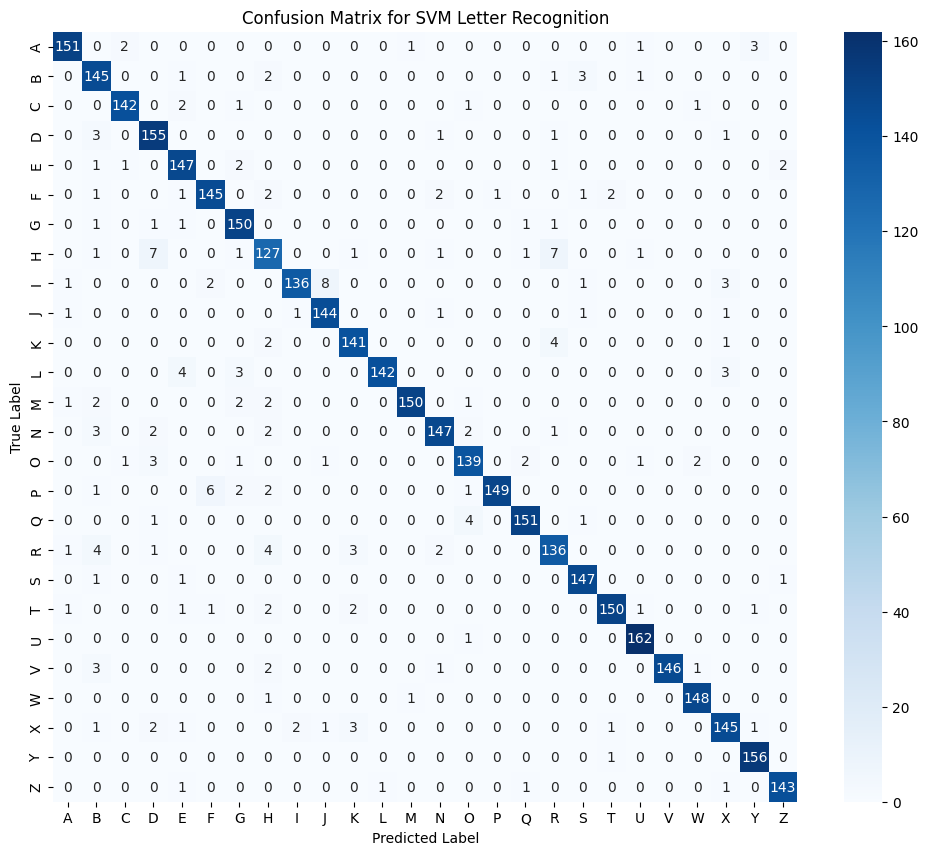

In [26]:
# Confusion Matrix (optional visualization)
print("\nGenerating Confusion Matrix...")
cm = confusion_matrix(y_test, y_pred, labels=sorted(y.unique())) # Ensure labels are sorted alphabetically
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Letter Recognition')
plt.show()